In [ ]:
!pip install datasets
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
!pip install spacy

In [ ]:
import datasets
import pandas as pd
import tensorflow as tf
from google.colab import data_table
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import string
import numpy as np
import pandas as pd
import nltk
import string as s
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn import preprocessing
from keras.utils import to_categorical
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec

## Collection of Data

In [ ]:
dataset = datasets.load_dataset("ag_news") # Importing Data

In [ ]:
data_table.enable_dataframe_formatter()

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7600
    })
})

In [ ]:
train_data = dataset["train"]
train_data = pd.DataFrame(train_data)

test_data = dataset["test"]
test_data = pd.DataFrame(test_data)

In [ ]:
train_data.head()

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2


In [ ]:
test_data.head()

,text,label
0,Fears for T N pension after talks Unions repre...,2
1,The Race is On: Second Private Team Sets Launc...,3
2,Ky. Company Wins Grant to Study Peptides (AP) ...,3
3,Prediction Unit Helps Forecast Wildfires (AP) ...,3
4,Calif. Aims to Limit Farm-Related Smog (AP) AP...,3


## Analysis

### Data Preprocessing and Transformation

In [ ]:
maxlen = train_data['text'].apply(lambda x: len(x.split())).max()

def lowercasing(element):
    if isinstance(element, str):
        return element.lower()
    return element

train_data['text'] = train_data['text'].apply(lowercasing)
test_data['text'] = test_data['text'].apply(lowercasing)

In [ ]:
train_data.head()

,text,label
0,wall st. bears claw back into the black (reute...,2
1,carlyle looks toward commercial aerospace (reu...,2
2,oil and economy cloud stocks' outlook (reuters...,2
3,iraq halts oil exports from main southern pipe...,2
4,"oil prices soar to all-time record, posing new...",2


In [ ]:
def remove_punctuations(text):
    if isinstance(text, str):
        for punctuation in string.punctuation:
            text = text.replace(punctuation, ' ')
    return text

train_data['text'] = train_data['text'].apply(remove_punctuations)
test_data['text'] = test_data['text'].apply(remove_punctuations)

In [ ]:
train_data.head()

,text,label
0,wall st bears claw back into the black reute...,2
1,carlyle looks toward commercial aerospace reu...,2
2,oil and economy cloud stocks outlook reuters...,2
3,iraq halts oil exports from main southern pipe...,2
4,oil prices soar to all time record posing new...,2


In [ ]:
def remove_numbers(text):
    if isinstance(text, str):
        for digit in string.digits:
            text = text.replace(digit, '')
    return text

train_data['text'] = train_data['text'].apply(remove_numbers)
test_data['text'] = test_data['text'].apply(remove_numbers)

In [ ]:
train_data.head()

,text,label
0,wall st bears claw back into the black reute...,2
1,carlyle looks toward commercial aerospace reu...,2
2,oil and economy cloud stocks outlook reuters...,2
3,iraq halts oil exports from main southern pipe...,2
4,oil prices soar to all time record posing new...,2


In [ ]:
def remove_stopwords(text):
    stop = set(stopwords.words('english'))
    words = text.split()
    new_words = [word for word in words if word not in stop]
    return ' '.join(new_words)

train_data['text'] = train_data['text'].apply(remove_stopwords)
test_data['text'] = test_data['text'].apply(remove_stopwords)

In [ ]:
train_data.head()

,text,label
0,wall st bears claw back black reuters reuters ...,2
1,carlyle looks toward commercial aerospace reut...,2
2,oil economy cloud stocks outlook reuters reute...,2
3,iraq halts oil exports main southern pipeline ...,2
4,oil prices soar time record posing new menace ...,2


In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatization(word):
    if isinstance(word, str):
        return lemmatizer.lemmatize(word)
    return word

train_data['text'] = train_data['text'].apply(lemmatization)
test_data['text'] = test_data['text'].apply(lemmatization)

In [ ]:
train_data.head()

,text,label
0,wall st bears claw back black reuters reuters ...,2
1,carlyle looks toward commercial aerospace reut...,2
2,oil economy cloud stocks outlook reuters reute...,2
3,iraq halts oil exports main southern pipeline ...,2
4,oil prices soar time record posing new menace ...,2


In [ ]:
train_data_eda = train_data.copy()
test_data_eda = test_data.copy()

In [ ]:
vocab_size = 10000
embed_size = 32

tok = Tokenizer(num_words = vocab_size)
tok.fit_on_texts(train_data['text'])
tok.fit_on_texts(test_data['text'])

train_data['text'] = tok.texts_to_sequences(train_data['text'])
test_data['text'] = tok.texts_to_sequences(test_data['text'])

In [ ]:
train_data.head()

,text,label
0,"[349, 274, 1494, 55, 722, 3, 3, 614, 7765, 349...",2
1,"[968, 741, 1164, 4048, 3, 3, 786, 686, 254, 48...",2
2,"[17, 280, 4246, 40, 645, 3, 3, 2254, 371, 41, ...",2
3,"[25, 6973, 17, 1643, 769, 439, 2669, 3, 3, 728...",2
4,"[17, 41, 4166, 34, 81, 7181, 1, 5, 280, 52, 52...",2


In [ ]:
test_data.head()

,text,label
0,"[776, 47, 1342, 106, 1631, 3829, 321, 6038, 16...",2
1,"[375, 53, 786, 59, 967, 337, 1569, 605, 9596, ...",3
2,"[9930, 15, 329, 4094, 408, 4, 4, 15, 6280, 929...",3
3,"[8210, 525, 1947, 615, 4, 4, 3233, 3970, 1000,...",3
4,"[825, 1577, 3166, 4113, 1073, 4, 4, 439, 454, ...",3


In [ ]:
train_data['text'] = train_data['text'].apply(lambda x: pad_sequences([x], maxlen=maxlen)[0])
test_data['text'] = test_data['text'].apply(lambda x: pad_sequences([x], maxlen=maxlen)[0])

In [ ]:
train_data.head()

,text,label
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2


In [ ]:
test_data.head()

,text,label
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3


### Exploratory Data Analysis

In [ ]:
train_data_eda.shape

(120000, 2)

In [ ]:
test_data_eda.shape

(7600, 2)

In [ ]:
train_data_eda.label.value_counts()

2    30000
3    30000
1    30000
0    30000
Name: label, dtype: int64

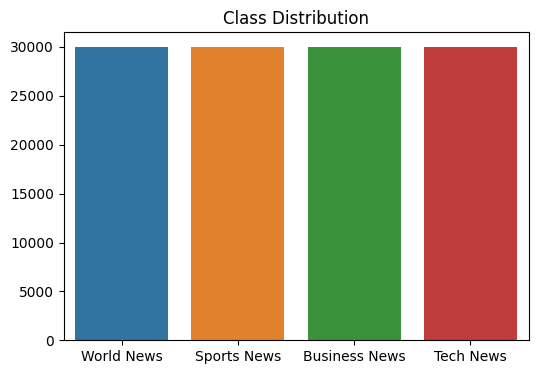

In [ ]:
# Class Distribution Analysis
class_counts = train_data_eda['label'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks(range(4), ['World News', 'Sports News', 'Business News', 'Tech News'])
plt.title('Class Distribution')
plt.show()

In [ ]:
test_data_eda.label.value_counts()

2    1900
3    1900
1    1900
0    1900
Name: label, dtype: int64

In [ ]:
train_data_eda.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
test_data_eda.isnull().sum()

text     0
label    0
dtype: int64

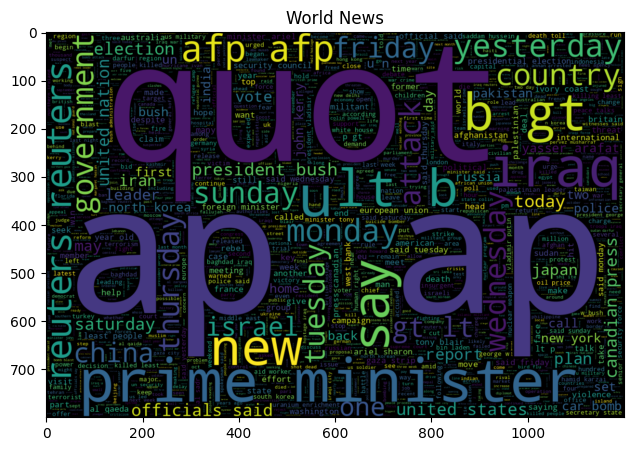

In [ ]:
world1 = train_data_eda.text[train_data_eda.label[train_data_eda.label==0].index]
plt.figure(figsize = (10,5)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(world1))
plt.title("World News")
plt.imshow(wordcloud,interpolation = 'bilinear');

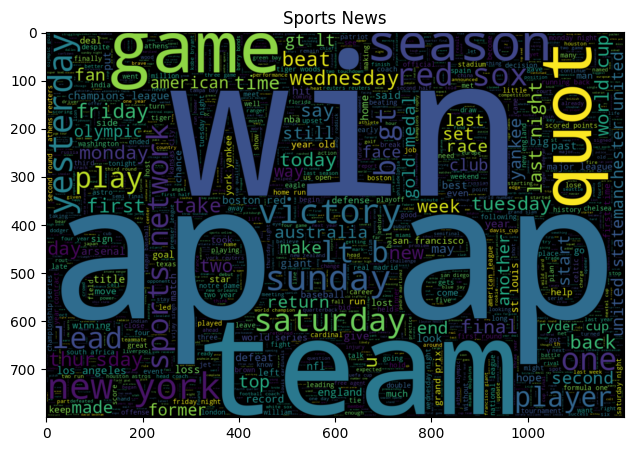

In [ ]:
world2 = train_data_eda.text[train_data_eda.label[train_data_eda.label==1].index]
plt.figure(figsize = (10,5)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(world2))
plt.title("Sports News")
plt.imshow(wordcloud,interpolation = 'bilinear');

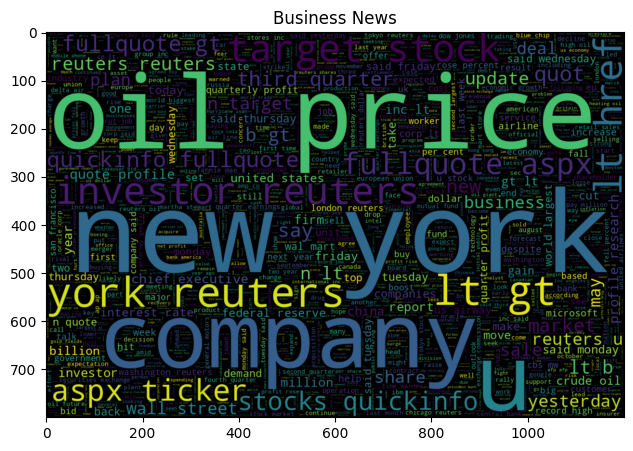

In [ ]:
world3 = train_data_eda.text[train_data_eda.label[train_data_eda.label==2].index]
plt.figure(figsize = (10,5)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(world3))
plt.title("Business News")
plt.imshow(wordcloud,interpolation = 'bilinear');

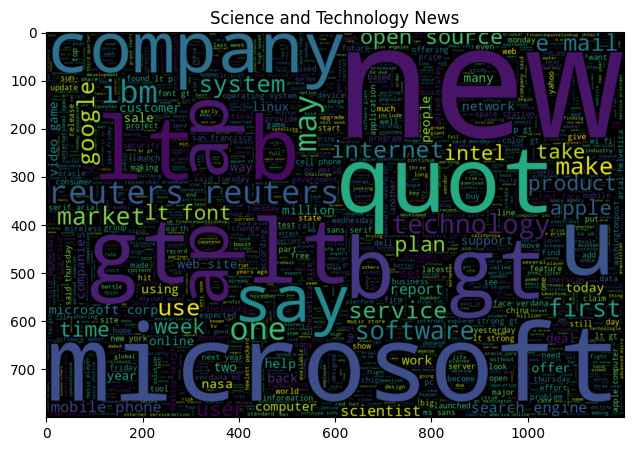

In [ ]:
world4 = train_data_eda.text[train_data_eda.label[train_data_eda.label==3].index]
plt.figure(figsize = (10,5)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(world4))
plt.title("Science and Technology News")
plt.imshow(wordcloud,interpolation = 'bilinear');

In [ ]:
train_data_eda.head()

,text,label
0,wall st bears claw back black reuters reuters ...,2
1,carlyle looks toward commercial aerospace reut...,2
2,oil economy cloud stocks outlook reuters reute...,2
3,iraq halts oil exports main southern pipeline ...,2
4,oil prices soar time record posing new menace ...,2


In [ ]:
# NER Analysis
import spacy
from collections import defaultdict, Counter
n = spacy.load('en_core_web_sm')
def perform_ner_column(text_column):
    d = list(n.pipe(text_column))
    n_e = defaultdict(list)
    e_c = defaultdict(Counter)
    for d1 in d:
        for e in d1.ents:
            n_e[e.label_].append(e.text)
            e_c[e.label_][e.text] += 1
    t_ee = {}
    for l, c in e_c.items():
        t_ee[l] = [entity for entity, c1 in c.most_common(50)]
    return t_ee
t_c = train_data_eda["text"][:10000]
t_e = perform_ner_column(t_c)
for l, e in t_e.items():
    print(f"{l}: {e}")

ORG: ['microsoft', 'google', 'ibm', 'reuters', 'nasa', 'href http www investor reuters', 'new york', 'un', 'wal mart', 'sec', 'new york reuters', 'al qaeda', 'intel', 'nec', 'yahoo', 'google inc', 'united nations', 'sony', 'cbs', 'united airlines', 'hamas', 'ford', 'motorola', 'gymnastics', 'fed', 'macromedia', 'cnn', 'al qaida', 'white house', 'iraq reuters', 'href http', 'congress', 'fcc', 'taliban', 'senate', 'boeing', 'army', 'playboy', 'nbc', 'hewlett packard', 'apple', 'san francisco reuters', 'london reuters', 'lilly', 'washington reuters', 'treasury', 'warner', 'gop', 'pentagon', 'supreme court']
PERSON: ['bush', 'quot', 'michael phelps', 'john kerry', 'hugo chavez', 'ariel sharon', 'paul hamm', 'serif', 'helvetica', 'abu ghraib', 'kerry', 'hamid karzai', 'muqtada al sadr', 'al sadr', 'moqtada al sadr', 'johnson', 'bobby fischer', 'justin gatlin', 'sharon', 'chavez', 'george w bush', 'williams', 'vladimir putin', 'gatlin', 'sadr', 'tony blair', 'arafat', 'yasser arafat', 'osama

In [ ]:
# Training Word2Vec model
sentences = [text.split() for text in train_data_eda['text']]
model_word2vec = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)

In [ ]:
# Word Similarity Analysis
similar_words_prime = model_word2vec.wv.most_similar("prime")
print("Words similar to 'prime':")
for word, similarity in similar_words_prime:
    print(f"{word}: {similarity}")

Words similar to 'prime':
keyuraphan: 0.8244876265525818
pisanu: 0.7960994243621826
shivraj: 0.7827610373497009
giuseppe: 0.782672643661499
bijan: 0.7645360827445984
erakat: 0.7593415975570679
khorram: 0.7448946833610535
saeb: 0.7397149801254272
lapierre: 0.7395654320716858
shoichi: 0.7367920279502869


In [ ]:
similar_words_game = model_word2vec.wv.most_similar("game")
print("Words similar to 'game':")
for word, similarity in similar_words_game:
    print(f"{word}: {similarity}")

Words similar to 'game':
games: 0.7263332009315491
play: 0.5799111723899841
tragicomedy: 0.5769765973091125
opus: 0.5761773586273193
franchise: 0.5448745489120483
matchup: 0.5407401919364929
postseason: 0.5395525693893433
accelerators: 0.5255386233329773
opener: 0.5225147604942322
madden: 0.5166462659835815


In [ ]:
similar_words_company = model_word2vec.wv.most_similar("company")
print("Words similar to 'company':")
for word, similarity in similar_words_company:
    print(f"{word}: {similarity}")

Words similar to 'company':
giant: 0.78047776222229
firm: 0.7487821578979492
companies: 0.654605507850647
maker: 0.6283325552940369
unit: 0.6136001944541931
supplier: 0.6097885370254517
acquisition: 0.5923078656196594
companys: 0.5917797684669495
subsidiary: 0.5865916609764099
assets: 0.5835081934928894


In [ ]:
similar_words_microsoft = model_word2vec.wv.most_similar("microsoft")
print("Words similar to 'microsoft':")
for word, similarity in similar_words_microsoft:
    print(f"{word}: {similarity}")

Words similar to 'microsoft':
windows: 0.6695334315299988
sp: 0.6645975708961487
xp: 0.6510486602783203
aol: 0.6262804269790649
microsofts: 0.6229841709136963
longhorn: 0.6201565265655518
symantec: 0.6129153966903687
oracle: 0.6039695739746094
telephoneprovider: 0.6029330492019653
vied: 0.5923817157745361


In [ ]:
train_data_eda_1 = train_data_eda.copy()
test_data_eda_1 = test_data_eda.copy()
train_data_eda_1['word_count'] = train_data_eda_1['text'].apply(lambda x: len(x.split()))
train_data_eda_1['char_count'] = train_data_eda_1['text'].apply(len)
train_data_eda_1['avg_word_length'] = train_data_eda_1['char_count'] / train_data_eda_1['word_count']
test_data_eda_1['char_count'] = test_data_eda_1['text'].apply(len)
test_data_eda_1['word_count'] = test_data_eda_1['text'].apply(lambda x: len(x.split()))
test_data_eda_1['avg_word_length'] = test_data_eda_1['char_count'] / test_data_eda_1['word_count']

In [ ]:
train_data_eda_1.head()

,text,label,word_count,char_count,avg_word_length
0,wall st bears claw back black reuters reuters ...,2,18,112,6.222222
1,carlyle looks toward commercial aerospace reut...,2,27,214,7.925926
2,oil economy cloud stocks outlook reuters reute...,2,24,166,6.916667
3,iraq halts oil exports main southern pipeline ...,2,29,214,7.379310
4,oil prices soar time record posing new menace ...,2,30,199,6.633333


In [ ]:
test_data_eda_1.head()

,text,label,char_count,word_count,avg_word_length
0,fears n pension talks unions representing work...,2,121,17,7.117647
1,race second private team sets launch date huma...,3,252,36,7.000000
2,ky company wins grant study peptides ap ap com...,3,198,27,7.333333
3,prediction unit helps forecast wildfires ap ap...,3,226,34,6.647059
4,calif aims limit farm related smog ap ap south...,3,184,28,6.571429


In [ ]:
correlation_matrix = train_data_eda_1.corr()
correlation_with_label = correlation_matrix['label'].sort_values(ascending=False)
correlation_with_label # Correlation is very less, cannot be considered

<ipython-input-88-7a53779e476a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data_eda_1.corr()


label              1.000000
word_count         0.008374
avg_word_length    0.007058
char_count         0.005026
Name: label, dtype: float64

### Feature engineering and feature selection

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=4500, stop_words='english') # Number of features are 4500 only because of system requirements barrier

In [ ]:
train_tfidf = tfidf_vectorizer.fit_transform(train_data_eda['text'])
test_tfidf = tfidf_vectorizer.transform(test_data_eda['text'])

In [ ]:
train_tfidf.shape

(120000, 4500)

In [ ]:
test_tfidf.shape

(7600, 4500)

In [ ]:
train_tfidf.toarray()[1:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
vocab = tfidf_vectorizer.get_feature_names_out()

In [ ]:
dist = np.sum(train_tfidf.toarray(), axis=0)

word_freq = pd.DataFrame({'word':vocab,'freq':dist})

In [ ]:
word_freq.sort_values(by='freq',ascending=False)[:50]

,word,freq
2624,new,2068.571213
180,ap,1983.323028
3350,reuters,1896.787027
3453,said,1823.859864
1711,gt,1408.722175
2315,lt,1404.099000
3157,quot,1331.882214
4485,year,1208.244901
4453,world,1125.646463
2699,oil,1055.888281


In [ ]:
train_tfidf_array = train_tfidf.toarray()
train_tfidf_df = pd.DataFrame(data=train_tfidf_array, columns=tfidf_vectorizer.get_feature_names_out())
train_tfidf_df.head()

,aaron,abandoned,abbas,abbey,abc,abducted,ability,able,aboard,abroad,...,young,yudhoyono,yukos,zarqawi,zealand,ziff,zimbabwe,zone,zook,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_tfidf_array = test_tfidf.toarray()
test_tfidf_df = pd.DataFrame(data=test_tfidf_array, columns=tfidf_vectorizer.get_feature_names_out())
test_tfidf_df.head()

,aaron,abandoned,abbas,abbey,abc,abducted,ability,able,aboard,abroad,...,young,yudhoyono,yukos,zarqawi,zealand,ziff,zimbabwe,zone,zook,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
la = preprocessing.LabelEncoder()
y_train = la.fit_transform(train_data['label'])
y_train = to_categorical(y_train)
print(y_train[:5])

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [ ]:
la = preprocessing.LabelEncoder()
y_test = la.fit_transform(test_data['label'])
y_test = to_categorical(y_test)
print(y_test[:5])

[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [ ]:
train_data.head() # For NLP Models/tasks

,text,label
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2


In [ ]:
test_data.head() # For NLP Models/tasks

,text,label
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3


In [ ]:
train_tfidf_df.head() # For ML Tasks/Models

,aaron,abandoned,abbas,abbey,abc,abducted,ability,able,aboard,abroad,...,young,yudhoyono,yukos,zarqawi,zealand,ziff,zimbabwe,zone,zook,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_tfidf_df.head() # For ML Tasks/Models

,aaron,abandoned,abbas,abbey,abc,abducted,ability,able,aboard,abroad,...,young,yudhoyono,yukos,zarqawi,zealand,ziff,zimbabwe,zone,zook,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train.shape

(120000, 4)

In [ ]:
y_train

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [ ]:
y_test.shape

(7600, 4)

In [ ]:
y_test

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)